# Assignment- Linear Regression

author: Adrish Maity

__Business Objective__: 
Model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables.

__Tools used for analysis__:
Language : Python 
Libraries : pandas, numpy, matplotlib, seaborn, sklearn, statsmodels

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np

# Libraries used for data preparation, model building, model evolution
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# libraries used for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display max columns to None to get all columns of dataframe at output
pd.options.display.max_columns = None

In [3]:
# importing Dataset
dataset = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# get first 5 rows of the dataset
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# get the shape of the dataset
dataset.shape

(205, 26)

In [6]:
# get column wise data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
# display the overview of the dataset
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Correct The DataTypes and Select Relevant Variables

In [8]:
# Car_ID is unique for each observation. Removing the column
dataset = dataset.drop("car_ID", axis=1)

In [9]:
# Split the value by space(" ") and take the car company name i.e. first index
dataset["carCompany"] = dataset.CarName.apply(lambda x: x.split(" ")[0].lower())

In [10]:
dataset.carCompany.value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: carCompany, dtype: int64

As we observe there are some spelling mistakes present in the columns. We need to correct the values

In [11]:
dataset.carCompany[dataset.carCompany=="maxda"] = "mazda"
dataset.carCompany[dataset.carCompany=="porcshce"] = "porsche"
dataset.carCompany[dataset.carCompany=="toyouta"] = "toyota"
dataset.carCompany[dataset.carCompany.isin(["vokswagen","vw"])] = "volkswagen"

In [12]:
# Lets recheck the values in car comany
dataset.carCompany.value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: carCompany, dtype: int64

In [13]:
# drop the CarName column
dataset = dataset.drop("CarName", axis=1)

In [14]:
# store the categorical columns
categoricalColumns = [
                        'carCompany',
                        'symboling',
                        'fueltype',
                        'aspiration',
                        'doornumber',
                        'carbody',
                        'drivewheel',
                        'enginelocation',
                        'enginetype',
                        'cylindernumber',
                        'fuelsystem'
                     ]

# set the type of the columns as "category"
dataset[categoricalColumns] = dataset[categoricalColumns].astype("category")


In [15]:
# lets see the column details
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null

In [16]:
#dataset.select_dtypes(['category']).columns
# dataset.select_dtypes([np.number]).columns

## Visualising Data

### Visualising the numeric variables

In [17]:
# Get the numeric data columns
numericColumns = dataset.select_dtypes([np.number]).columns.tolist()

<Figure size 1440x864 with 0 Axes>

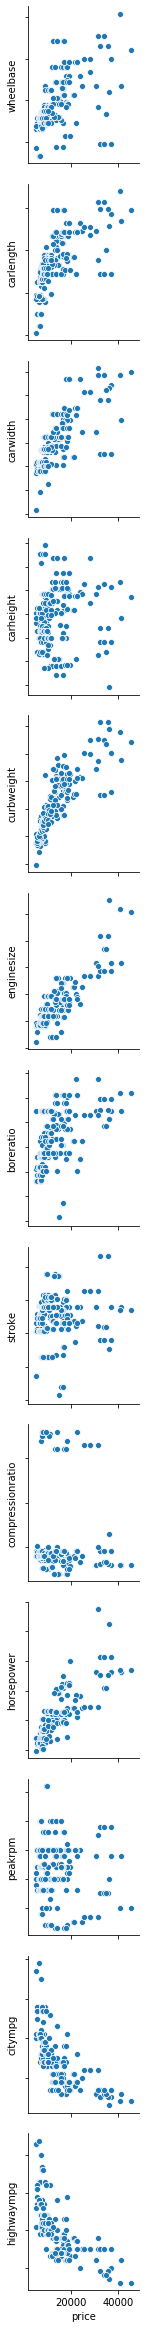

In [18]:
# Get the scatter plots of all the numeric columns agains the price of the car
plt.figure(figsize=(20,12))
g = sns.pairplot(data=dataset,
                  x_vars=['price'],
                  y_vars=numericColumns[:-1])
g.set(yticklabels=[])
plt.show()

### Visualising the categorical variables

In [19]:
categoricalColumns = dataset.select_dtypes(['category']).columns

In [20]:
# Function to plot categorical variable with the price details
def plotCategoricalVariables_withPredictor(dataset, independent_columns, dependent_column):
    n_rows = int(np.ceil(len(independent_columns)/3))
    n_cols = 3

    plt.figure(figsize=(15, 20))
    for i,x in enumerate(independent_columns):
        plt.subplot(n_rows, n_cols, i+1)
        g=sns.boxplot(x = x, y = dependent_column, data = dataset)
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
    
    plt.tight_layout()
    plt.show()
    

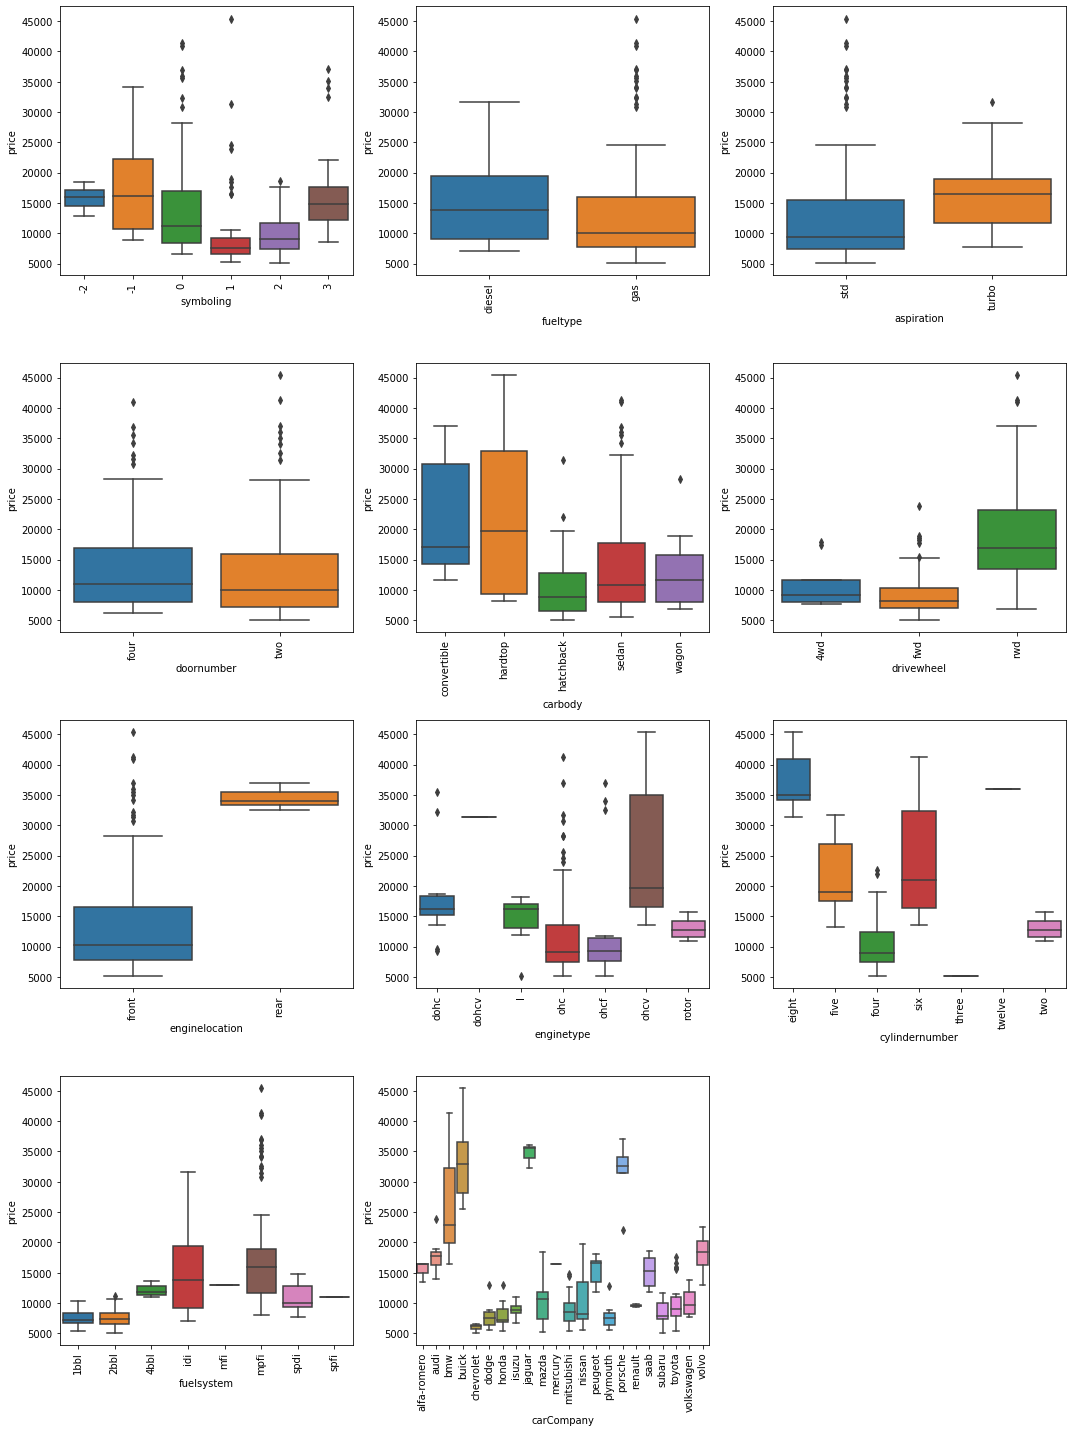

In [21]:
plotCategoricalVariables_withPredictor(dataset=dataset, independent_columns=categoricalColumns, dependent_column='price')

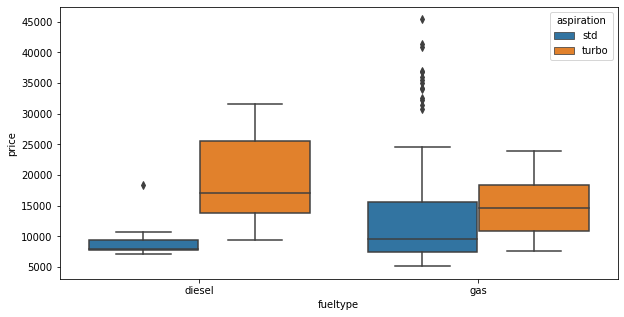

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fueltype', y = 'price', hue = 'aspiration', data = dataset)
plt.show()

we can see that price in each category changes as we introduce `turbo` aspiration in the car along with fueltype

## Data Preperation

In [23]:
dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Derived features

prepare some derived variables for analysis purposes

In [24]:
dataset["carvolume"] = dataset.apply(lambda x: x.carwidth * x.carheight * x.carlength, axis=1)
dataset["car_height_length_ratio"] = dataset.apply(lambda x: x.carheight / x.carlength, axis=1)
dataset["car_horsepower_rpm_ratio"] = dataset.apply(lambda x: x.horsepower / x.peakrpm, axis=1)
dataset["car_highway_city_mpg_avg"] = dataset.apply(lambda x: (x.highwaympg + x.citympg)/2, axis=1)
dataset["car_engine_stroke_ratio"] = dataset.apply(lambda x: x.enginesize/x.stroke, axis=1)

In [25]:
# store the derived column names
derivedFeatures = [
                    "carvolume", 
                    "car_height_length_ratio", 
                    "car_horsepower_rpm_ratio", 
                    "car_highway_city_mpg_avg", 
                    "car_engine_stroke_ratio"
                ]

<Figure size 1080x720 with 0 Axes>

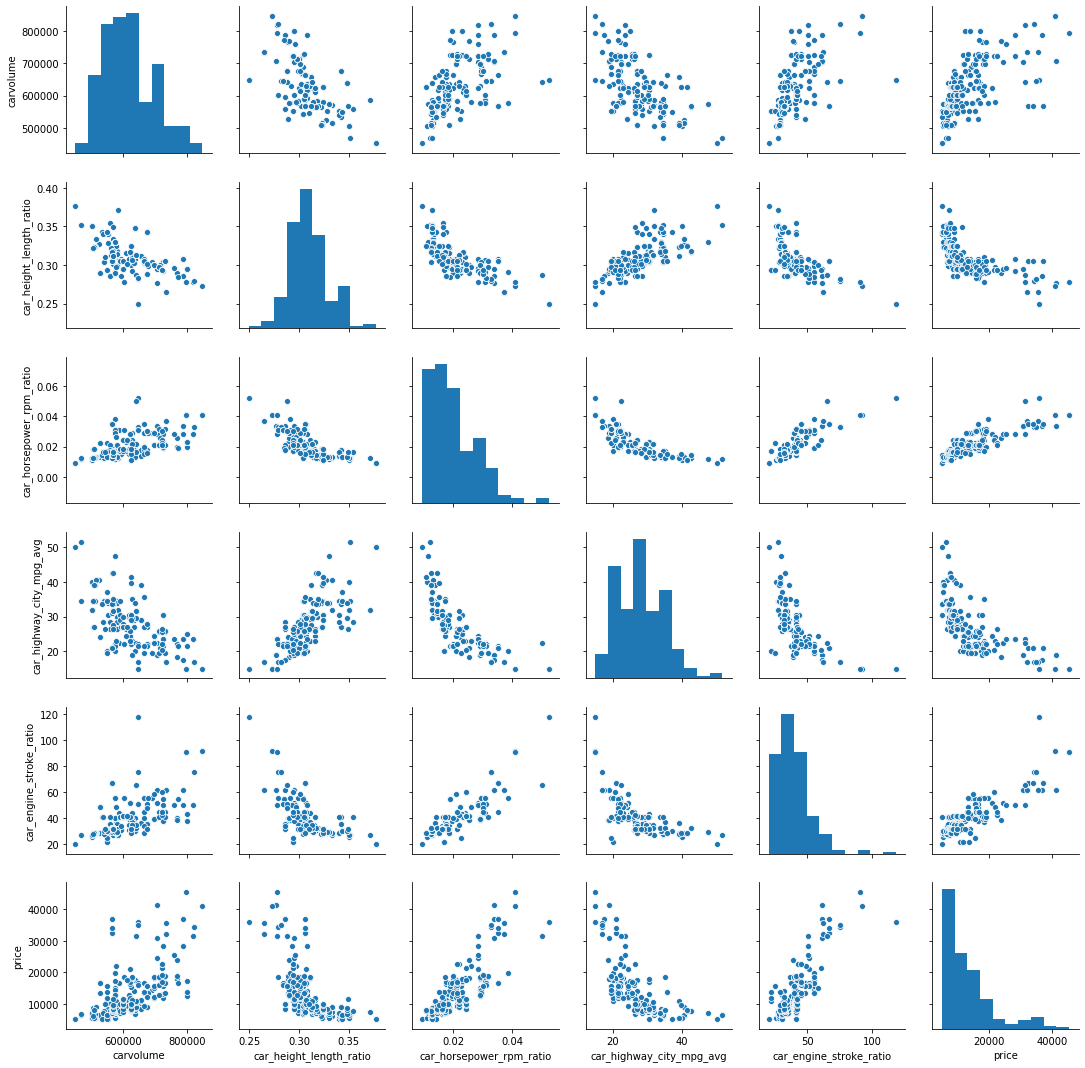

In [26]:
# Plot the derived variables and price of the car and check the correlation between those
plt.figure(figsize=(15,10))
sns.pairplot(dataset[derivedFeatures+["price"]])
plt.show()

## Generate Dummy Variables

In [27]:
# generate dummy varaibles and store the new dataset in data_with_dummy
data_with_dummy = pd.get_dummies(dataset, drop_first=True, prefix_sep="$")

In [28]:
# check the overview of the dataset
data_with_dummy.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carvolume,car_height_length_ratio,car_horsepower_rpm_ratio,car_highway_city_mpg_avg,car_engine_stroke_ratio,symboling$-1,symboling$0,symboling$1,symboling$2,symboling$3,fueltype$gas,aspiration$turbo,doornumber$two,carbody$hardtop,carbody$hatchback,carbody$sedan,carbody$wagon,drivewheel$fwd,drivewheel$rwd,enginelocation$rear,enginetype$dohcv,enginetype$l,enginetype$ohc,enginetype$ohcf,enginetype$ohcv,enginetype$rotor,cylindernumber$five,cylindernumber$four,cylindernumber$six,cylindernumber$three,cylindernumber$twelve,cylindernumber$two,fuelsystem$2bbl,fuelsystem$4bbl,fuelsystem$idi,fuelsystem$mfi,fuelsystem$mpfi,fuelsystem$spdi,fuelsystem$spfi,carCompany$audi,carCompany$bmw,carCompany$buick,carCompany$chevrolet,carCompany$dodge,carCompany$honda,carCompany$isuzu,carCompany$jaguar,carCompany$mazda,carCompany$mercury,carCompany$mitsubishi,carCompany$nissan,carCompany$peugeot,carCompany$plymouth,carCompany$porsche,carCompany$renault,carCompany$saab,carCompany$subaru,carCompany$toyota,carCompany$volkswagen,carCompany$volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,0.289100,0.022200,24.0,48.507463,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,0.289100,0.022200,24.0,48.507463,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,0.306075,0.030800,22.5,43.804035,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,0.307475,0.018545,27.0,32.058824,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,0.307475,0.020909,20.0,40.000000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting the data into training and test sets

In [29]:
# assign random seed as 0 and random_state as 100 while spliting the dataset as train and test with 70:30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(data_with_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
# Rescaling the features in train dataset

# select the columns which are not dummy i.e. numeric columns for scaling purposes
columnsToScale = [col for col in df_train.columns.tolist() if "$" not in col]

# use min_max_scaler to scale the data between 0 and 1
scaler = MinMaxScaler()

# apply scaller to all the variables except dummy variables
df_train[columnsToScale] = scaler.fit_transform(df_train[columnsToScale])

In [31]:
# observe the first 5 rows in train dataset
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carvolume,car_height_length_ratio,car_horsepower_rpm_ratio,car_highway_city_mpg_avg,car_engine_stroke_ratio,symboling$-1,symboling$0,symboling$1,symboling$2,symboling$3,fueltype$gas,aspiration$turbo,doornumber$two,carbody$hardtop,carbody$hatchback,carbody$sedan,carbody$wagon,drivewheel$fwd,drivewheel$rwd,enginelocation$rear,enginetype$dohcv,enginetype$l,enginetype$ohc,enginetype$ohcf,enginetype$ohcv,enginetype$rotor,cylindernumber$five,cylindernumber$four,cylindernumber$six,cylindernumber$three,cylindernumber$twelve,cylindernumber$two,fuelsystem$2bbl,fuelsystem$4bbl,fuelsystem$idi,fuelsystem$mfi,fuelsystem$mpfi,fuelsystem$spdi,fuelsystem$spfi,carCompany$audi,carCompany$bmw,carCompany$buick,carCompany$chevrolet,carCompany$dodge,carCompany$honda,carCompany$isuzu,carCompany$jaguar,carCompany$mazda,carCompany$mercury,carCompany$mitsubishi,carCompany$nissan,carCompany$peugeot,carCompany$plymouth,carCompany$porsche,carCompany$renault,carCompany$saab,carCompany$subaru,carCompany$toyota,carCompany$volkswagen,carCompany$volvo
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0.243366,0.425236,0.068667,0.534247,0.104186,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0.343542,0.374888,0.385878,0.219178,0.290058,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0.313145,0.489062,0.175814,0.342466,0.119266,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0.204773,0.311314,0.297482,0.246575,0.289593,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0.752188,0.432354,0.519978,0.123288,0.215728,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
# get overview of the train dataset
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carvolume,car_height_length_ratio,car_horsepower_rpm_ratio,car_highway_city_mpg_avg,car_engine_stroke_ratio,symboling$-1,symboling$0,symboling$1,symboling$2,symboling$3,fueltype$gas,aspiration$turbo,doornumber$two,carbody$hardtop,carbody$hatchback,carbody$sedan,carbody$wagon,drivewheel$fwd,drivewheel$rwd,enginelocation$rear,enginetype$dohcv,enginetype$l,enginetype$ohc,enginetype$ohcf,enginetype$ohcv,enginetype$rotor,cylindernumber$five,cylindernumber$four,cylindernumber$six,cylindernumber$three,cylindernumber$twelve,cylindernumber$two,fuelsystem$2bbl,fuelsystem$4bbl,fuelsystem$idi,fuelsystem$mfi,fuelsystem$mpfi,fuelsystem$spdi,fuelsystem$spfi,carCompany$audi,carCompany$bmw,carCompany$buick,carCompany$chevrolet,carCompany$dodge,carCompany$honda,carCompany$isuzu,carCompany$jaguar,carCompany$mazda,carCompany$mercury,carCompany$mitsubishi,carCompany$nissan,carCompany$peugeot,carCompany$plymouth,carCompany$porsche,carCompany$renault,carCompany$saab,carCompany$subaru,carCompany$toyota,carCompany$volkswagen,carCompany$volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.437947,0.474787,0.248362,0.359805,0.188368,0.090909,0.349650,0.300699,0.118881,0.125874,0.909091,0.181818,0.440559,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.216789,0.162146,0.178454,0.186087,0.129973,0.288490,0.478536,0.460174,0.324786,0.332873,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.13584

In [33]:
# get the dependent and independent variables
y_train = df_train.pop('price')
X_train = df_train

### RFE (Recursive feature elimination)

In [34]:
# RFE

# create a basic linear regression model
lm = LinearRegression()

# fit the x_train and y_train 
lm.fit(X_train, y_train)

# apply RFE and get best 15 columns which ar significant in the model
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
# get the columns which are selected by automatic RFE

# list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
print(col)

Index(['carlength', 'carheight', 'curbweight', 'enginesize', 'horsepower',
       'peakrpm', 'car_height_length_ratio', 'car_horsepower_rpm_ratio',
       'car_engine_stroke_ratio', 'symboling$-1', 'symboling$1', 'symboling$3',
       'enginelocation$rear', 'carCompany$bmw', 'carCompany$buick'],
      dtype='object')


In [36]:
# get the columns which are not selected by automatic RFE

print(X_train.columns[~rfe.support_])

Index(['wheelbase', 'carwidth', 'boreratio', 'stroke', 'compressionratio',
       'citympg', 'highwaympg', 'carvolume', 'car_highway_city_mpg_avg',
       'symboling$0', 'symboling$2', 'fueltype$gas', 'aspiration$turbo',
       'doornumber$two', 'carbody$hardtop', 'carbody$hatchback',
       'carbody$sedan', 'carbody$wagon', 'drivewheel$fwd', 'drivewheel$rwd',
       'enginetype$dohcv', 'enginetype$l', 'enginetype$ohc', 'enginetype$ohcf',
       'enginetype$ohcv', 'enginetype$rotor', 'cylindernumber$five',
       'cylindernumber$four', 'cylindernumber$six', 'cylindernumber$three',
       'cylindernumber$twelve', 'cylindernumber$two', 'fuelsystem$2bbl',
       'fuelsystem$4bbl', 'fuelsystem$idi', 'fuelsystem$mfi',
       'fuelsystem$mpfi', 'fuelsystem$spdi', 'fuelsystem$spfi',
       'carCompany$audi', 'carCompany$chevrolet', 'carCompany$dodge',
       'carCompany$honda', 'carCompany$isuzu', 'carCompany$jaguar',
       'carCompany$mazda', 'carCompany$mercury', 'carCompany$mitsubishi',
 

## Building model using statsmodel, for the detailed statistics

In [37]:
# function to generate VIF report for a set of variables
def generate_VIF_report(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Model 1 

In [39]:

# Adding a constant variable 
X_train_rfe_const_1 = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train,X_train_rfe_const_1).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.91e-64
Time:                        18:29:56   Log-Likelihood:                 202.05
No. Observations:                 143   AIC:                            -372.1
Df Residuals:                     127   BIC:                            -324.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [40]:
# get the VIF report
generate_VIF_report(X_train_rfe)

,Features,VIF
7,car_horsepower_rpm_ratio,829.34
4,horsepower,705.26
0,carlength,90.38
5,peakrpm,77.00
2,curbweight,71.34
6,car_height_length_ratio,54.36
3,enginesize,54.04
1,carheight,50.46
8,car_engine_stroke_ratio,28.71
10,symboling$1,2.17


`car_engine_stroke_ratio` column has very high p-value so this is not significant. Removing the column.

In [41]:
# Drop the variable with high VIF
X_train_rfe = X_train_rfe.drop('car_engine_stroke_ratio', axis=1)

In [42]:
# get the VIF report
generate_VIF_report(X_train_rfe)

,Features,VIF
7,car_horsepower_rpm_ratio,813.60
4,horsepower,682.09
0,carlength,86.62
5,peakrpm,74.33
2,curbweight,70.00
6,car_height_length_ratio,52.10
1,carheight,49.46
3,enginesize,30.39
9,symboling$1,2.11
10,symboling$3,2.05


`car_horsepower_rpm_ratio` has very high VIF. Removing the column.

In [43]:
# Drop the variable with high VIF
X_train_rfe = X_train_rfe.drop('car_horsepower_rpm_ratio', axis=1)

#### Model 2

In [44]:
# Adding a constant variable 
X_train_rfe_const_2 = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_rfe_const_2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.14e-62
Time:                        18:29:56   Log-Likelihood:                 193.95
No. Observations:                 143   AIC:                            -359.9
Df Residuals:                     129   BIC:                            -318.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We can see that `symboling$1` has a p-value `0.600` which indicates high insignificance. Removing the variable

In [45]:
X_train_rfe = X_train_rfe.drop('symboling$1', axis=1)

#### Model 3

In [46]:
# Adding a constant variable 
X_train_rfe_const_3 = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe_const_3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     117.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.18e-63
Time:                        18:29:57   Log-Likelihood:                 193.80
No. Observations:                 143   AIC:                            -361.6
Df Residuals:                     130   BIC:                            -323.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We can see that `symboling$3` has a p-value `0.507` which indicates high insignificance. Removing the variable

In [47]:
X_train_rfe = X_train_rfe.drop('symboling$3', axis=1)

#### Model 4

In [48]:
# Adding a constant variable 
X_train_rfe_const_4 = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_rfe_const_4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.26e-64
Time:                        18:29:57   Log-Likelihood:                 193.56
No. Observations:                 143   AIC:                            -363.1
Df Residuals:                     131   BIC:                            -327.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We can see that `symboling$-1` feature has a p-value of `0.416`. We can reject the variable.

In [49]:
X_train_rfe = X_train_rfe.drop('symboling$-1', axis=1)

#### Model 5

In [50]:
# Adding a constant variable 
X_train_rfe_const_5 = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train,X_train_rfe_const_5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.43e-65
Time:                        18:29:57   Log-Likelihood:                 193.20
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     132   BIC:                            -331.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We can see that `enginesize` feature has a p-value of `0.190`. We can reject the variable.

In [51]:
X_train_rfe = X_train_rfe.drop("enginesize", axis=1)

#### Model 6

In [52]:
# Adding a constant variable 
X_train_rfe_const_6 = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train,X_train_rfe_const_6).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.61e-66
Time:                        18:29:57   Log-Likelihood:                 192.26
No. Observations:                 143   AIC:                            -364.5
Df Residuals:                     133   BIC:                            -334.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We can see that `peakrpm` feature has a p-value of `0.410`. We can reject the variable.

In [53]:
X_train_rfe = X_train_rfe.drop("peakrpm", axis=1)

#### Model 7

In [54]:
# Adding a constant variable 
X_train_rfe_const_7 = sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train,X_train_rfe_const_7).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     176.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.66e-67
Time:                        18:29:58   Log-Likelihood:                 191.90
No. Observations:                 143   AIC:                            -365.8
Df Residuals:                     134   BIC:                            -339.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [55]:
# get the VIF report
generate_VIF_report(X_train_rfe)

,Features,VIF
2,curbweight,48.50
0,carlength,41.98
1,carheight,20.12
3,horsepower,12.66
4,car_height_length_ratio,6.49
7,carCompany$buick,1.40
5,enginelocation$rear,1.14
6,carCompany$bmw,1.13


Remove `curbweight` as VIF is very high.

In [56]:
X_train_rfe = X_train_rfe.drop("curbweight", axis=1)

### Model 8

In [57]:
# Adding a constant variable 
X_train_rfe_const_8 = sm.add_constant(X_train_rfe)
lm_8 = sm.OLS(y_train,X_train_rfe_const_8).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.99e-63
Time:                        18:29:58   Log-Likelihood:                 179.11
No. Observations:                 143   AIC:                            -342.2
Df Residuals:                     135   BIC:                            -318.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [58]:
# get the VIF report
generate_VIF_report(X_train_rfe)

,Features,VIF
0,carlength,22.89
1,carheight,19.51
2,horsepower,7.00
3,car_height_length_ratio,6.10
6,carCompany$buick,1.15
4,enginelocation$rear,1.12
5,carCompany$bmw,1.12


Remove `carlength` as VIF is very high.

In [59]:
X_train_rfe = X_train_rfe.drop("carlength", axis=1)

### Model 9

In [60]:
# Adding a constant variable 
X_train_rfe_const_9 = sm.add_constant(X_train_rfe)
lm_9 = sm.OLS(y_train,X_train_rfe_const_9).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.67e-55
Time:                        18:29:59   Log-Likelihood:                 157.45
No. Observations:                 143   AIC:                            -300.9
Df Residuals:                     136   BIC:                            -280.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [61]:
# get the VIF report
generate_VIF_report(X_train_rfe)

,Features,VIF
0,carheight,6.83
2,car_height_length_ratio,5.51
1,horsepower,2.23
5,carCompany$buick,1.15
4,carCompany$bmw,1.12
3,enginelocation$rear,1.07


Remove `carheight` as VIF is little higher than 5 and create one more model to check if there is any significant change in the model statistics

In [62]:
X_train_rfe = X_train_rfe.drop("carheight", axis=1)

### Model 10

In [63]:
# Adding a constant variable 
X_train_rfe_const_10 = sm.add_constant(X_train_rfe)
lm_10 = sm.OLS(y_train,X_train_rfe_const_10).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     140.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.73e-52
Time:                        18:29:59   Log-Likelihood:                 146.63
No. Observations:                 143   AIC:                            -281.3
Df Residuals:                     137   BIC:                            -263.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [64]:
# get the VIF report
generate_VIF_report(X_train_rfe)

,Features,VIF
0,horsepower,1.95
1,car_height_length_ratio,1.68
3,carCompany$bmw,1.09
4,carCompany$buick,1.08
2,enginelocation$rear,1.05


### Stoping the creation of further models as all the varaibles selected as significant as well as the VIFs are well below 5

## Residual Analysis of the train data

In [65]:
y_train_pred = lm_10.predict(X_train_rfe_const_10)

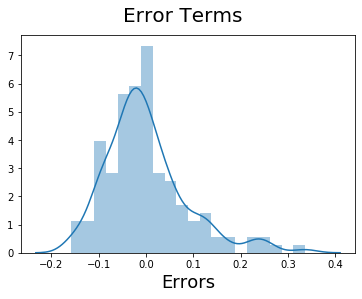

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
r_squared = r2_score(y_true=y_train, y_pred=y_train_pred)

print('r_square_value :',r_squared)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,np.sqrt(mse))

r_square_value : 0.8369470526482594
Mean_Squared_Error : 0.007531964547830389
Root_Mean_Squared_Error : 0.08678689156681664


## Make prediction using the final model

In [68]:
# apply scaling to test dataset
# apply scaller to all the variables except dummy variables
df_test_scaled = df_test.copy()

df_test_scaled[columnsToScale] = scaler.transform(df_test_scaled[columnsToScale])

In [69]:
df_test_scaled.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carvolume,car_height_length_ratio,car_horsepower_rpm_ratio,car_highway_city_mpg_avg,car_engine_stroke_ratio,symboling$-1,symboling$0,symboling$1,symboling$2,symboling$3,fueltype$gas,aspiration$turbo,doornumber$two,carbody$hardtop,carbody$hatchback,carbody$sedan,carbody$wagon,drivewheel$fwd,drivewheel$rwd,enginelocation$rear,enginetype$dohcv,enginetype$l,enginetype$ohc,enginetype$ohcf,enginetype$ohcv,enginetype$rotor,cylindernumber$five,cylindernumber$four,cylindernumber$six,cylindernumber$three,cylindernumber$twelve,cylindernumber$two,fuelsystem$2bbl,fuelsystem$4bbl,fuelsystem$idi,fuelsystem$mfi,fuelsystem$mpfi,fuelsystem$spdi,fuelsystem$spfi,carCompany$audi,carCompany$bmw,carCompany$buick,carCompany$chevrolet,carCompany$dodge,carCompany$honda,carCompany$isuzu,carCompany$jaguar,carCompany$mazda,carCompany$mercury,carCompany$mitsubishi,carCompany$nissan,carCompany$peugeot,carCompany$plymouth,carCompany$porsche,carCompany$renault,carCompany$saab,carCompany$subaru,carCompany$toyota,carCompany$volkswagen,carCompany$volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.481674,0.468938,0.272218,0.346443,0.207617,0.145161,0.274194,0.177419,0.241935,0.145161,0.887097,0.177419,0.435484,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.032258,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.212340,0.136621,0.176242,0.175523,0.136477,0.355139,0.449749,0.385142,0.431751,0.355139,0.319058,0.385142,0.499868,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.178127,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.045493,0.181042,0.033069,0.000000,0.057161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.317799,0.363474,0.138856,0.195205,0.121722,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,

In [70]:
# Dividing into X_test and y_test
y_test = df_test_scaled.pop('price')
X_test = df_test_scaled

In [71]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [72]:
# Creating X_test_m dataframe by dropping variables from X_test_m

X_test_m = X_test_m[X_train_rfe_const_10.columns.tolist()]


In [73]:
# Making predictions using the fourth model

y_pred_m = lm_10.predict(X_test_m)

In [74]:
# evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_true=y_test, y_pred=y_pred_m)
r_squared = r2_score(y_true=y_test, y_pred=y_pred_m)

print('r_square_value :',r_squared)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,np.sqrt(mse))

r_square_value : 0.8774252951396826
Mean_Squared_Error : 0.006551401616657099
Root_Mean_Squared_Error : 0.08094072903462816


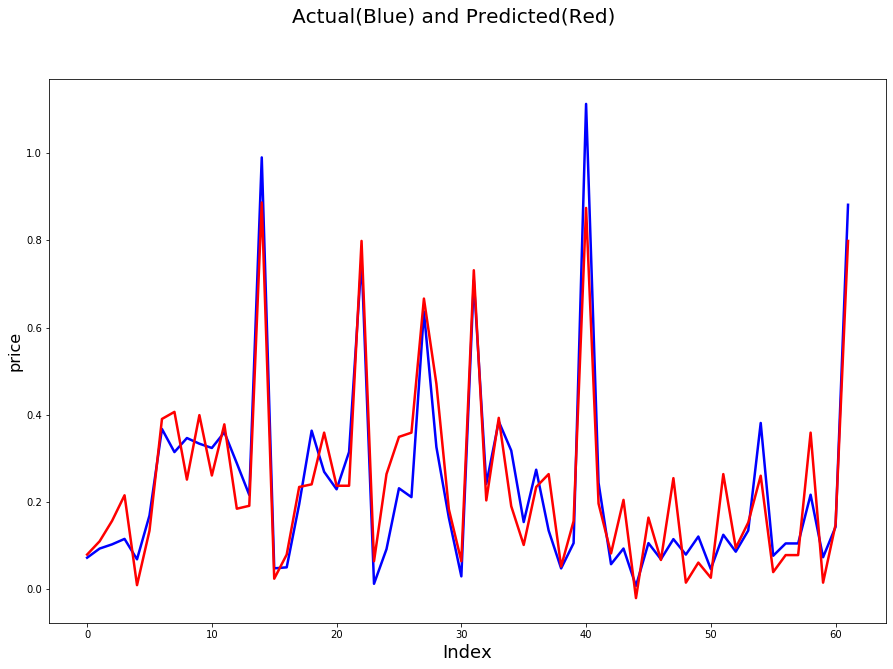

In [75]:
#Actual vs Predicted
fig = plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)),y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(range(len(y_test)),y_pred_m, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual(Blue) and Predicted(Red)', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('price', fontsize=16)                               # Y-label
plt.show()

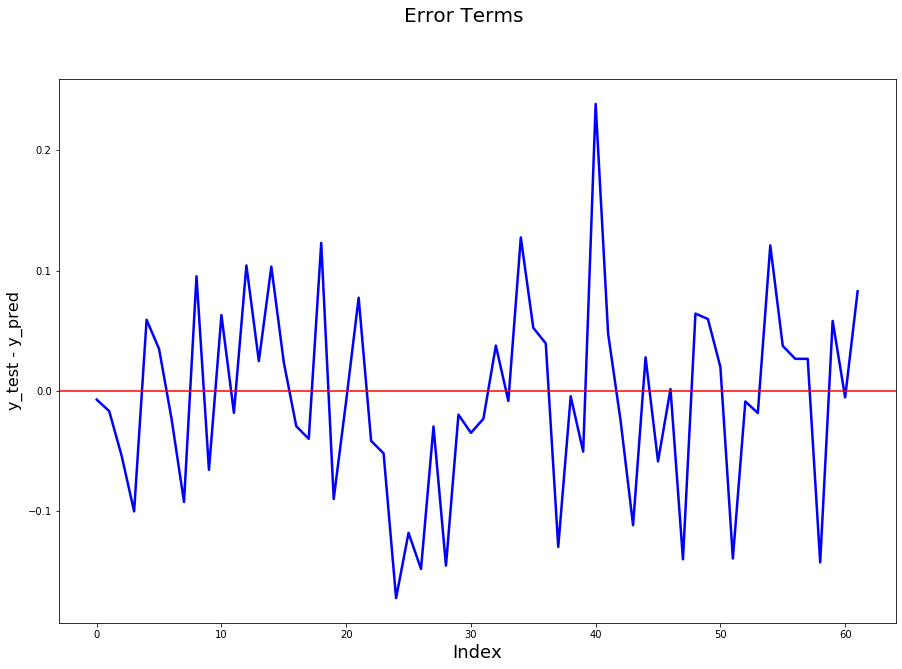

In [76]:
# Error terms
fig = plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)),y_test-y_pred_m, color="blue", linewidth=2.5, linestyle="-")
plt.axhline(y=0, color='r')
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test - y_pred', fontsize=16)                # Y-label
plt.show()

In [77]:
# Mean of error terms
print(((y_test-y_pred_m)**2).mean())
# Mean_Squared_Error : 0.006551401616657099

0.006551401616657098


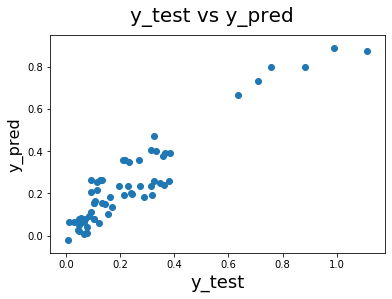

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    
plt.show()

## Summary

We can see that the equation of our best fitted line is:

### Price = 0.6893 X horsepower 
###                - 0.2839 X car_height_length_ratio 
###                + 0.2964 X enginelocation\\$rear 
###                + 0.2769 X carCompany\\$bmw 
###                + 0.3772 X carCompany\\$buick 
###               + 0.1705 

### In Train Dataset the model performance:
- R-squared: 0.8369470526482594
- Adj. R-squared: 0.831 
- Mean_Squared_Error : 0.007531964547830389
- Root_Mean_Squared_Error : 0.08678689156681664

### In Test Dataset the model performance:
- R-squared : 0.8774252951396826
- Mean_Squared_Error : 0.006551401616657099
- Root_Mean_Squared_Error : 0.08094072903462816
